 Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv', 
                 sep=',', 
                 )
print(data.shape)
data.head(5).append(data.tail(5))



(1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isnull().any().any()
#пропусков нет.  
#количественные признаки:duration, amount, age
#бинарные: people_liable, telephone, foreign_worker, credit_risk
#порядковые:status, savings, employment_duration, installment_rate, present_residence, number_credits, job, housing
#категориальные:purpose, personal_status_sex, property, other_debtors, credit_history, other_installment_plan


False

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
# your code here

data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
# your code here
#data['housing'].value_counts()
import numpy as np
print(np.sum((data['age'] < 30) &  (data['housing'] == 'rent')) / np.sum((data['age'] < 30)) * 100 ,'% клиентов моложе 30 лет снимает жилье'+ '\n',
     np.sum((data['age'] > 40)  &  (data['housing'] == 'rent')) / np.sum(data['age'] > 40)* 100 , '% клиентов старше 40 лет снимает жилье' 
      , sep = '')



66.66666666666666% клиентов моложе 30 лет снимает жилье
68.01470588235294% клиентов старше 40 лет снимает жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [6]:
# your code here
#data['number_credits'].value_counts()
np.sum((data['foreign_worker'] == 'yes') & ((data['number_credits']  == '4-5') | (data['number_credits']  == '>= 6') ))

1

### Задание 6 (1 балл)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

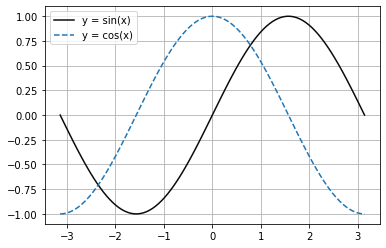

In [8]:
# your code here

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
y2 = np.cos(x)
fig, ax = plt.subplots()
ax.plot(x, y, label = 'y = sin(x)', color = '#0a0b0c')
ax.plot(x, y2, label = 'y = cos(x)', linestyle='--')
ax.grid()

ax.legend()

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

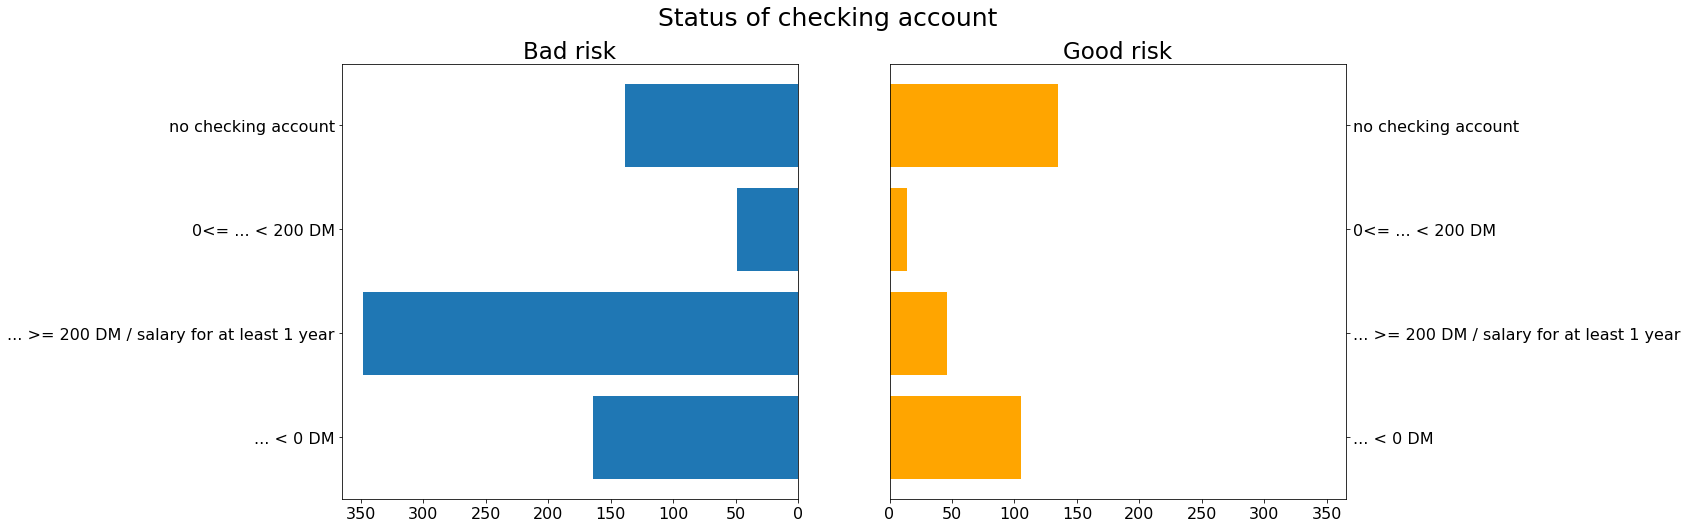

In [9]:
# your code here
#data.status[data.credit_risk == 'good'].value_counts().sort_index().max()
fig, ax = plt.subplots(1,2,figsize=(18,8))
fig.suptitle('Status of checking account', size = 25)

ax[1].barh(np.sort(data['status'].unique()), data.status[data.credit_risk == 'bad'].value_counts().sort_index(), color = 'orange')
ax[1].yaxis.tick_right()
ax[1].set_xlim(0,1.05 * data.status[data.credit_risk == 'good'].value_counts().sort_index().max())
ax[1].set_title('Good risk', size = 23)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[0].barh(np.sort(data['status'].unique()), data.status[data.credit_risk == 'good'].value_counts().sort_index())
ax[0].invert_xaxis()
ax[0].set_title('Bad risk', size = 23)
ax[0].tick_params(axis='both', which='major', labelsize=16)
plt.show()




### Задание 8  (0.5 балла)

In [10]:
import seaborn as sns


Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

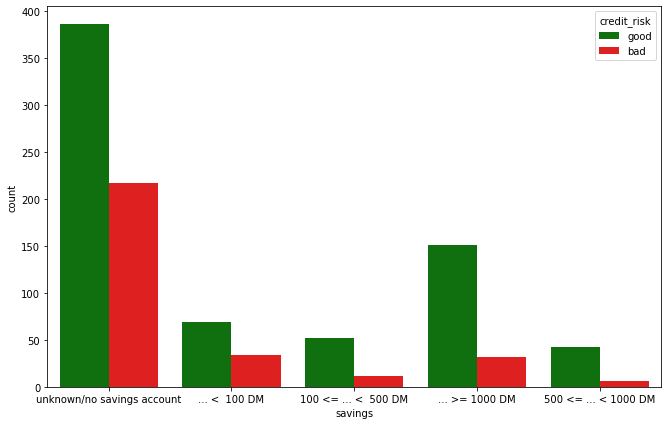

In [11]:
# your code here
fig, heat = plt.subplots(figsize = (11,7)) # https://www.dataforeverybody.com/seaborn-plot-figure-size/
sns.set_palette(["#008000", "#ff0000"])
heat = sns.countplot(x="savings", data=data, hue = 'credit_risk')
# с seaborn работать легче, восприятие результата, как по мне, сольно не отличается


### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

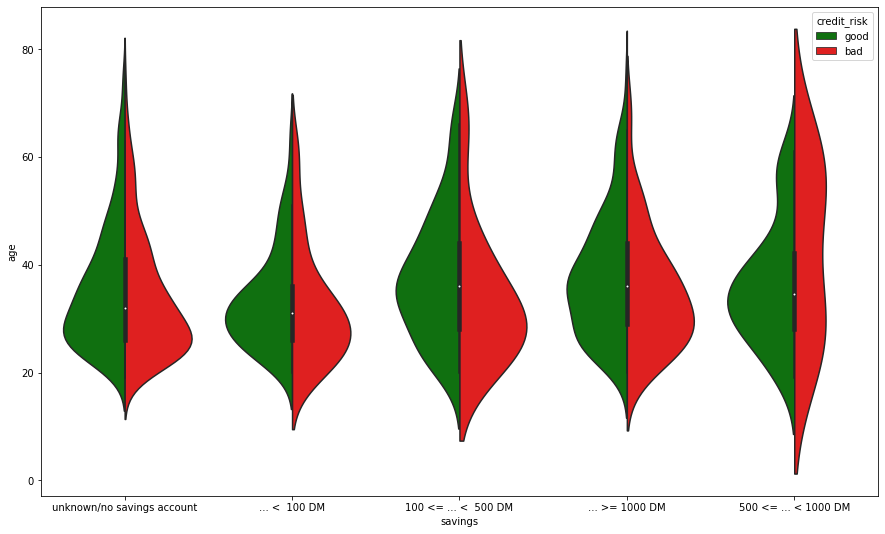

In [12]:
# your code here
fig, heat = plt.subplots(figsize = (15,9))
sns.violinplot(data = data, x = 'savings', y = 'age', hue = 'credit_risk', split = True)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

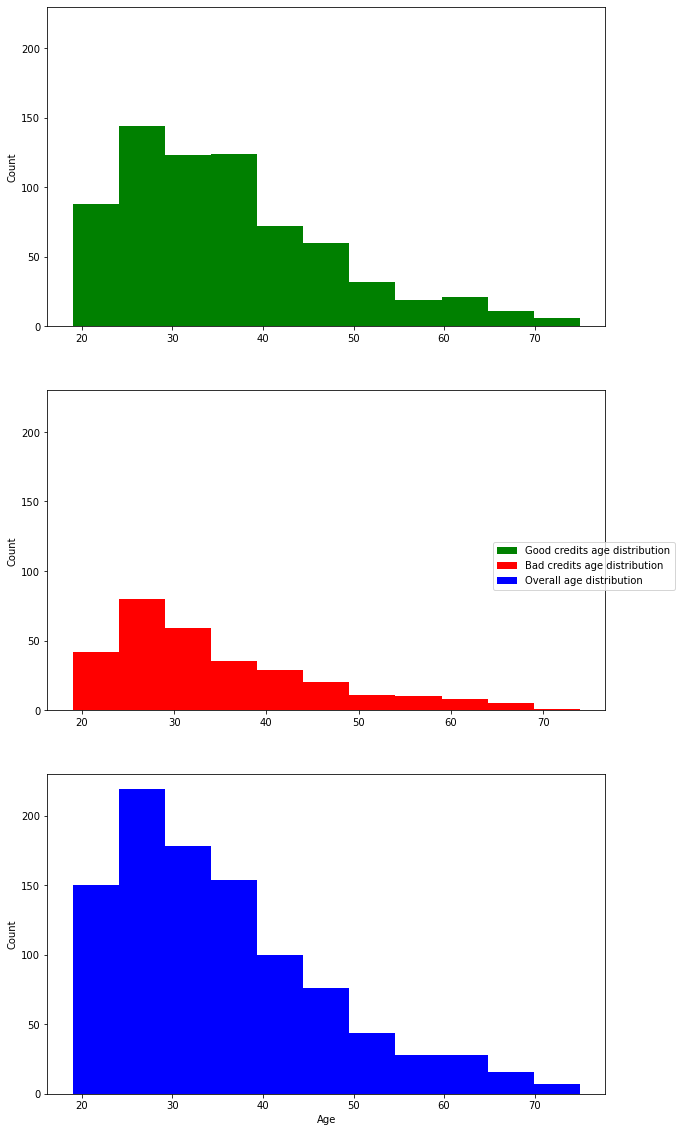

In [13]:
# your code here
#sns.displot(data = data, x = 'age', binwidth = 6)
#fig, heat = plt.subplots(figsize = (15,9))
#sns.displot(data = data, x = 'age',hue = 'credit_risk', bins = 11, row = 'credit_risk')
#sns.displot(data = data, x = 'age', bins = 11)
fig, ax = plt.subplots(3,1,figsize=(10,20), sharey = True)
ax[0].hist(data.age[data['credit_risk'] == 'good'], bins = 11, label = "Good credits age distribution")
ax[1].hist(data.age[data['credit_risk'] == 'bad'], bins = 11, color = 'red',label = "Bad credits age distribution")
ax[2].hist(data.age, bins = 11, color = 'blue', label = "Overall age distribution")
fig.legend(loc = 7)
plt.xlabel("Age")
#plt.ylabel("Count")
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')

#ax[0].bar(np.sort((data.age[data.credit_risk == 'bad'] ).unique()) , data.age[data.credit_risk == 'bad'].value_counts().sort_index(), bins = 11)
#ax[1].bar(np.sort((data.age[data.credit_risk == 'good'] ).unique()) , data.age[data.credit_risk == 'good'].value_counts().sort_index())
#ax[2].bar(np.sort((data.age).unique()) , data.age.value_counts().sort_index())

plt.show()


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

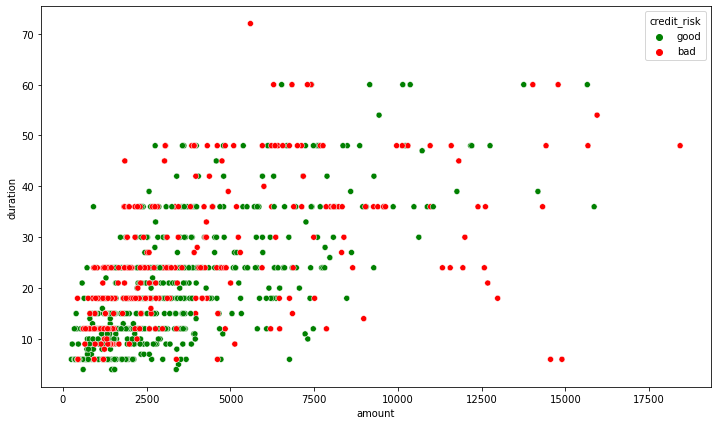

In [14]:
# your code here
fig, heat = plt.subplots(figsize = (12,7))
sns.scatterplot(x = 'amount' , y = 'duration', data = data, hue = 'credit_risk')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

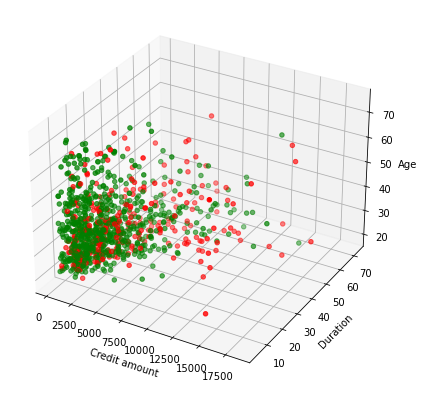

In [15]:
# your code here

#fig, heat = plt.subplots(figsize = (12,7))
#sns.scatter(x = 'amount' , y = 'duration', z = 'credit_history', data = data, hue = 'credit_risk')

fig = plt.figure(figsize = (12,7))
ad = ax = fig.add_subplot(111, projection = '3d')

x = data['amount'] 
y = data['duration']
z = data['age']
q = data.credit_risk.apply(lambda x: 'red' if x == 'bad' else 'green')
ax.scatter(x,y,z, color = q )
ax.set_zlabel('Age')
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.show()


### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [16]:
# your code here

stat_dummy = np.zeros_like(data.savings)
stat_dummy[data.status == '... < 0 DM'] = 1
stat_dummy[data.status == '0<= ... < 200 DM'] = 2
stat_dummy[data.status == '... >= 200 DM / salary for at least 1 year'] = 3
data.status = stat_dummy

liable_dummy = np.zeros_like(data.people_liable)
liable_dummy[data.people_liable == '3 or more'] = 1
data.people_liable = liable_dummy.copy()

phone_dummy = np.zeros_like(data.telephone)
phone_dummy[data.telephone == 'yes (under customer name)'] = 1
data.telephone = phone_dummy.copy()

foreing_dummy = np.zeros_like(data.foreign_worker)
foreing_dummy[data.foreign_worker == 'yes (under customer name)'] = 1
data.foreign_worker = foreing_dummy.copy()

risk_dummy = np.zeros_like(data.credit_risk)
risk_dummy[data.credit_risk == 'good'] = 1
data.credit_risk = risk_dummy.copy()

save_dummy = np.zeros_like(data.savings)
save_dummy[data.savings == '... <  100 DM'] = 1
save_dummy[data.savings=="100 <= ... <  500 DM"] = 2
save_dummy[data.savings == '500 <= ... < 1000 DM'] = 3
save_dummy[data.savings =='... >= 1000 DM'] = 4
data.savings = save_dummy.copy()

emp_dummy = np.zeros_like(data.employment_duration)
emp_dummy[data.employment_duration == '< 1 yr'] = 1
emp_dummy[data.employment_duration == '1 <= ... < 4 yrs'] = 2
emp_dummy[data.employment_duration == '4 <= ... < 7 yrs'] = 3
emp_dummy[data.employment_duration == '>= 7 yrs'] = 4
data.employment_duration = emp_dummy.copy()

inst_dummy = np.zeros_like(data.installment_rate)
inst_dummy[data.installment_rate == '20 <= ... < 25'] = 1
inst_dummy[data.installment_rate == '25 <= ... < 35'] = 2
inst_dummy[data.installment_rate == '>= 35'] = 3
data.installment_rate = inst_dummy.copy()

res_dummy = np.zeros_like(data.present_residence)
res_dummy[data.present_residence == '1 <= ... < 4 yrs'] = 1
res_dummy[data.present_residence == '4 <= ... < 7 yrs'] = 2
res_dummy[data.present_residence == '>= 7 yrs'] = 3
data.present_residence = res_dummy.copy()

num_dummy = np.zeros_like(data.number_credits)
num_dummy[data.number_credits == '2-3'] = 1
num_dummy[data.number_credits == '4-5'] = 2
num_dummy[data.number_credits =='>= 6'] = 3
data.number_credits = num_dummy.copy()

num_dummy = np.zeros_like(data.housing)
num_dummy[data.housing == 'for free'] = 1
num_dummy[data.housing == 'own'] = 2
data.housing = num_dummy

job_dummy = np.zeros_like(data.job)
job_dummy[data.job == 'unskilled - resident'] = 1
job_dummy[data.job == 'manager/self-empl./highly qualif. employee'] = 2
job_dummy[data.job == 'skilled employee/official'] = 3
data.job = job_dummy.copy()


data = data.drop(['purpose', 'credit_history','personal_status_sex', 'property' , 'other_debtors','other_installment_plans'], axis = 1)

data


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,1,0,3,0,0,0,1
1,0,9,2799,0,2,2,1,36,1,1,3,1,0,0,1
2,1,12,841,1,3,2,3,23,1,0,1,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,1,1,0,0,1
4,0,12,2171,0,2,0,3,38,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,2,3,21,1,0,1,1,0,0,0
996,0,24,2303,0,4,0,0,45,0,0,3,0,0,0,0
997,3,21,12680,4,4,0,3,30,2,0,2,0,1,0,0
998,1,12,6468,4,0,2,0,52,0,0,2,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [19]:
def predict(Xtest: np.array) -> np.array:
    max_amount = 0
    max_duration = 0
    for i in Xtest:
        if max_amount < i[2]:
            max_amount = i[2]
        if max_duration < i[1]:
            max_duration = i[1]
    for i in Xtest:
        i[2] = round(i[2] * 5 / max_amount)
        i[1] = round(i[1] * 5 / max_duration)
        i[7] = round(i[7] / 30)
    a = np.array([], dtype = np.int8)    
    for i in Xtest:
        k = 0
        if i[0] == 0:
            k -= 1
        if i[0] == 2:
            k += 0.3
        if i[0] == 3:
            k += 1
        
        if i[1] == 0:
            k += 1   
        if i[1] == 2:
            k -= 0.5 
        if i[1] == 3:
            k -= 1 
        if i[1] == 4:
            k -= 1
        if i[1] == 5:
            k -= 1.5
            
        if i[2] == 0:
            k += 0.1
        if i[2] == 1:
            k += 0.1
        if i[2] == 2:
            k -= 0.4
        if i[2] == 3:
            k -= 1
        if i[2] == 4:
            k -= 1.5
        if i[2] == 5:
            k -= 1
            
        if i[3] == 0:
            k -= 0.4
        if i[3] == 1:
            k -= 0.4
        if i[3] == 2:
            k += 0.5
        if i[3] == 3:
            k += 0.7
        if i[3] == 4:
            k += 0.5
            
        if i[4] == 0:
            k -= 0.4
        if i[4] == 1:
            k -= 0.3
        if i[4] == 2:
            k += 0.3
        if i[4] == 3:
            k += 0.6
        if i[4] == 4:
            k += 0.45
            #65 %
        if i[6] == 3:
            k += 0.45
            #66.4%
        if i[8] == 1 or 2:
            k += 0.15
            
        
        
        
            
            
        
            
        
            
            
            
                
        if k <= 0:
            k = 0
        else: k = 1
        a = np.append(a,k) 
        
    return a
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here

y_test = np.array(y_test, dtype = np.int32)

#print(type(y_test[1]))
#print(type(predict(X_test)[1]))


accuracy_score(y_test, predict(X_test))


C:\Users\79152\AppData\Local\Temp/ipykernel_13976/3285015367.py:97: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.7